# Student Academic Outcome Prediction

This notebook implements supervised learning techniques to predict student academic outcomes (Graduate, Dropout, or Enrolled) based on various student attributes. We'll explore the data, preprocess it, build different models, evaluate their performance, and interpret the results.

## 1. Import Required Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import time
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
sns.set_palette('deep')
%matplotlib inline

## 2. Data Loading and Exploration

Let's load the student dataset and explore its structure to understand the data we're working with.


First 5 rows of the train dataset:


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate



 Types of the columns:


id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u


Missing values:


id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 


Basic statistics:


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000



Target Train variable distribution:


Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

Target
Graduate    47.42
Dropout     33.06
Enrolled    19.52
Name: count, dtype: float64

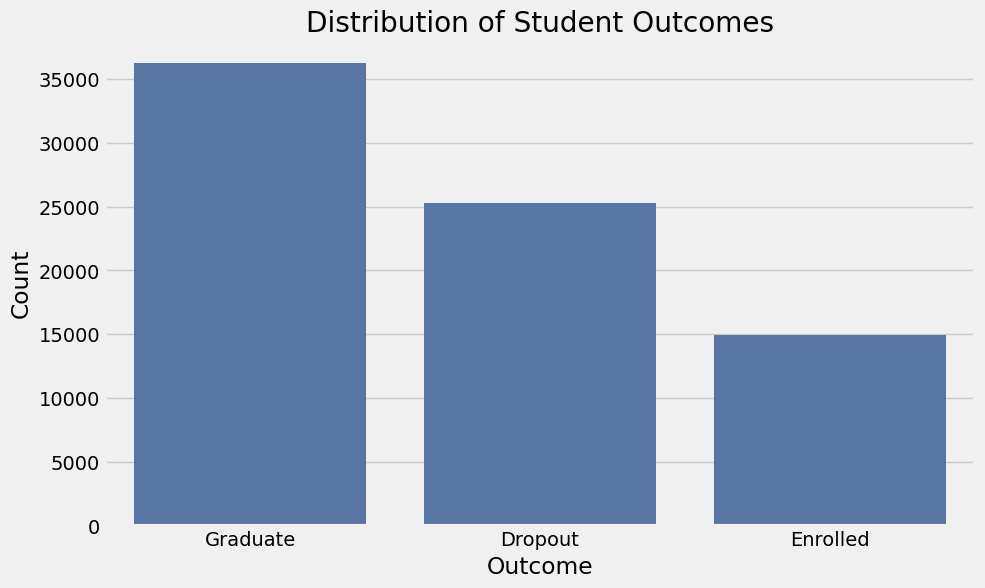

In [9]:
data_train = pd.read_csv("../data/train.csv")
data_test = pd.read_csv("../data/test.csv")

print("\nFirst 5 rows of the train dataset:")
display(data_train.head())

print("\n Types of the columns:")
display(data_train.dtypes)

print("\nMissing values:")
display(data_train.isnull().sum())

print("\nBasic statistics:")
display(data_train.describe())

print("\nTarget Train variable distribution:")
target_counts = data_train['Target'].value_counts()
display(target_counts)
target_percentage = round(100 * target_counts / len(data_train), 2)
display(target_percentage)

plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=data_train)
plt.title('Distribution of Student Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 3. Data Preprocessing

In this section, we'll handle missing values, encode categorical variables, and scale numerical features to prepare the data for modeling.

Making enrolled count as dropout

Original Target Distribution:


Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

Target
Graduate    47.42
Dropout     33.06
Enrolled    19.52
Name: proportion, dtype: float64


New Binary Target Distribution:


Target_Binary
Graduate        51222
Not_Graduate    25296
Name: count, dtype: int64

Target_Binary
Graduate        66.94
Not_Graduate    33.06
Name: proportion, dtype: float64

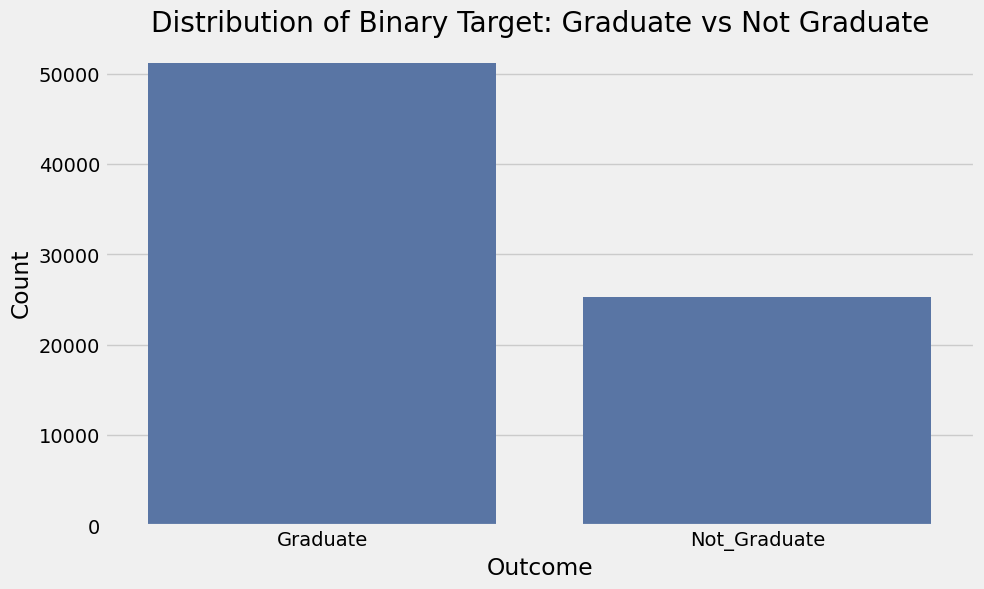

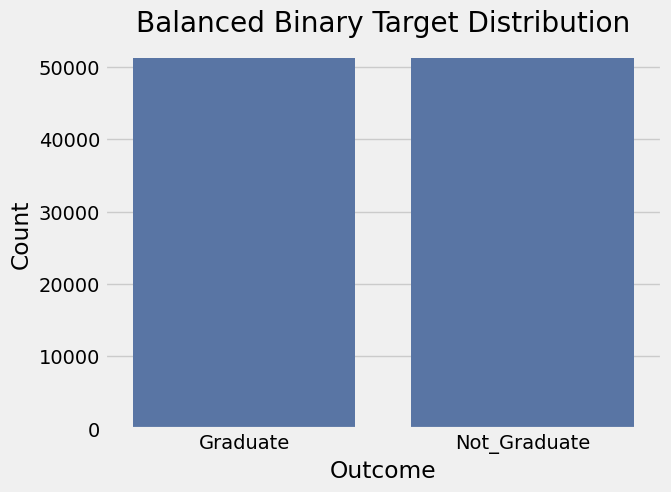

Balanced Distribution:


Target_Binary
Graduate        51222
Not_Graduate    51222
Name: count, dtype: int64


Feature selection will now be applied to this binary classification problem.


In [10]:
from imblearn.over_sampling import RandomOverSampler

print("Original Target Distribution:") 
display(data_train['Target'].value_counts()) 
display(data_train['Target'].value_counts(normalize=True).round(4) * 100)

data_train['Target_Binary'] = data_train['Target'].map({'Graduate': 'Graduate', 'Dropout': 'Not_Graduate', 'Enrolled': 'Graduate'})

print("\nNew Binary Target Distribution:") 
display(data_train['Target_Binary'].value_counts()) 
display(data_train['Target_Binary'].value_counts(normalize=True).round(4) * 100)

plt.figure(figsize=(10, 6)) 
sns.countplot(x='Target_Binary', data=data_train)
plt.title('Distribution of Binary Target: Graduate vs Not Graduate') 
plt.xlabel('Outcome') 
plt.ylabel('Count') 
plt.xticks(rotation=0) 
plt.show()

X_train = data_train.drop(['Target', 'Target_Binary', 'id'], axis=1)
y_train_binary = data_train['Target_Binary']

rus = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train_binary)

sns.countplot(x=y_resampled)
plt.title('Balanced Binary Target Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

print("Balanced Distribution:")
display(pd.Series(y_resampled).value_counts())

print("\nFeature selection will now be applied to this binary classification problem.")

## 4. Model Building

Let's build multiple classification models to predict student outcomes.


--- Logistic Regression ---
Accuracy: 88.97 %
Precision: 89.18 %
Recall: 88.97 %
F1 Score: 88.96 %
Training time: 0.5113 seconds
Testing time: 0.0000 seconds
Classification Report:
               precision    recall  f1-score   support

    Graduate       0.86      0.93      0.89     10245
Not_Graduate       0.92      0.85      0.89     10244

    accuracy                           0.89     20489
   macro avg       0.89      0.89      0.89     20489
weighted avg       0.89      0.89      0.89     20489

Confusion Matrix:
 [[9485  760]
 [1499 8745]]
Accuracy: 88.97 %
Precision: 89.18 %
Recall: 88.97 %
F1 Score: 88.96 %
Training time: 0.5113 seconds
Testing time: 0.0000 seconds
Classification Report:
               precision    recall  f1-score   support

    Graduate       0.86      0.93      0.89     10245
Not_Graduate       0.92      0.85      0.89     10244

    accuracy                           0.89     20489
   macro avg       0.89      0.89      0.89     20489
weighted avg      

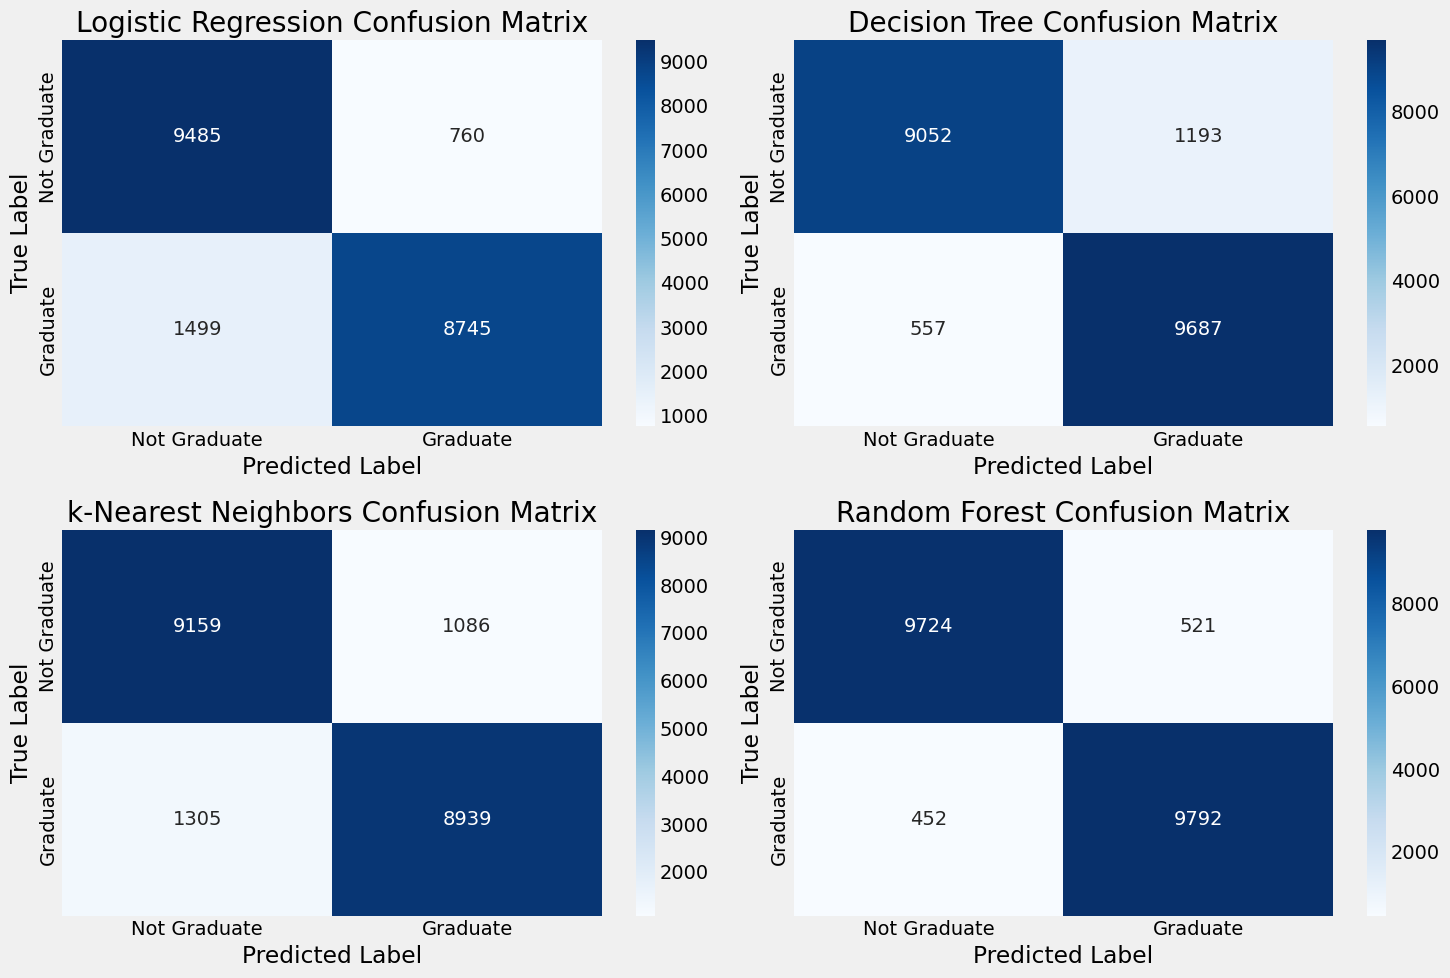

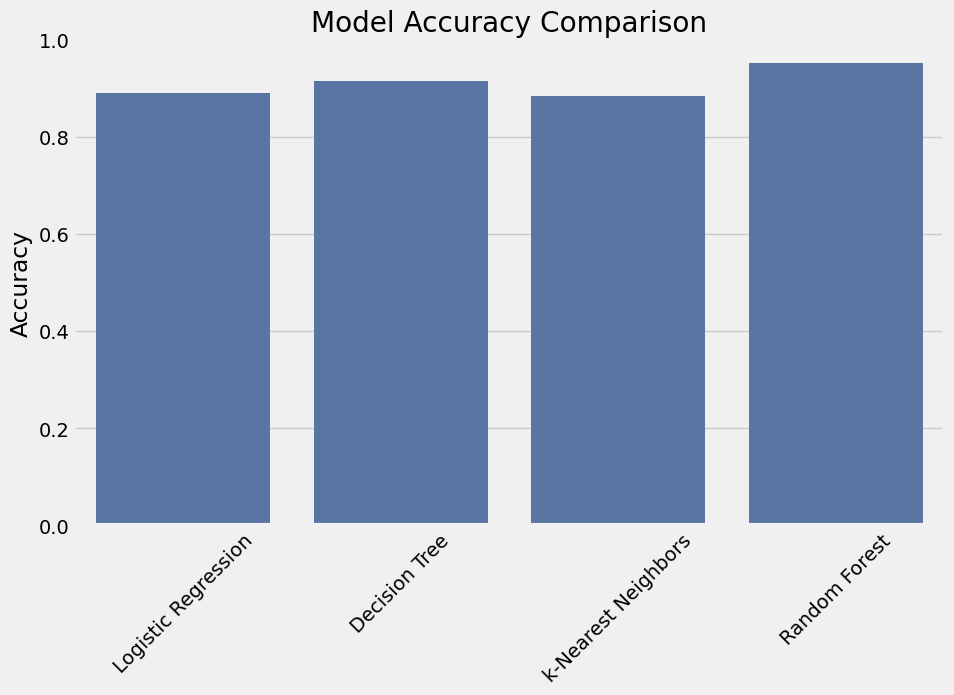

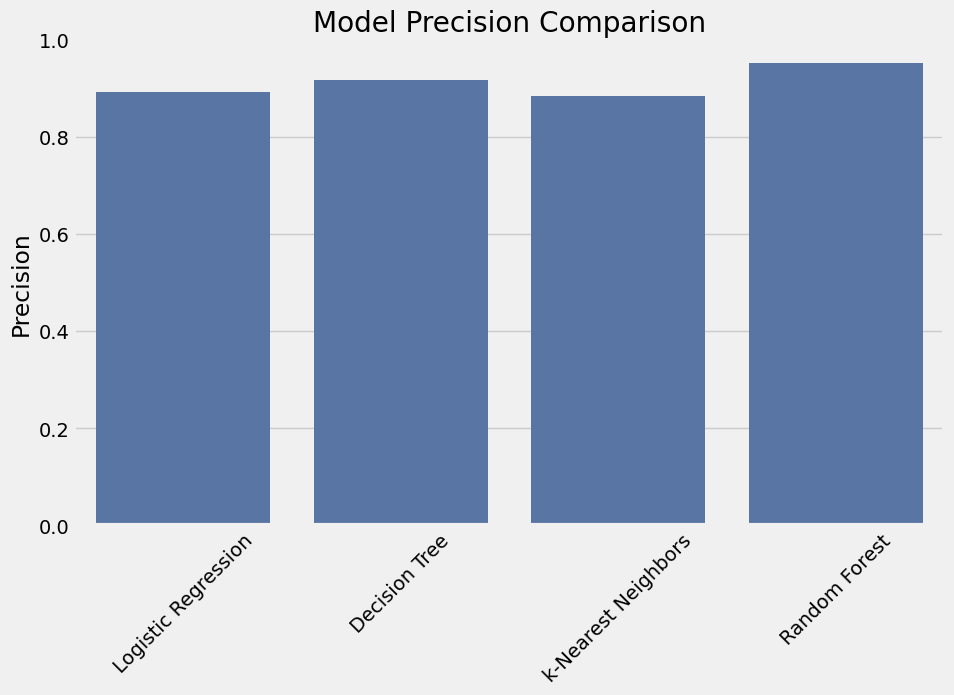

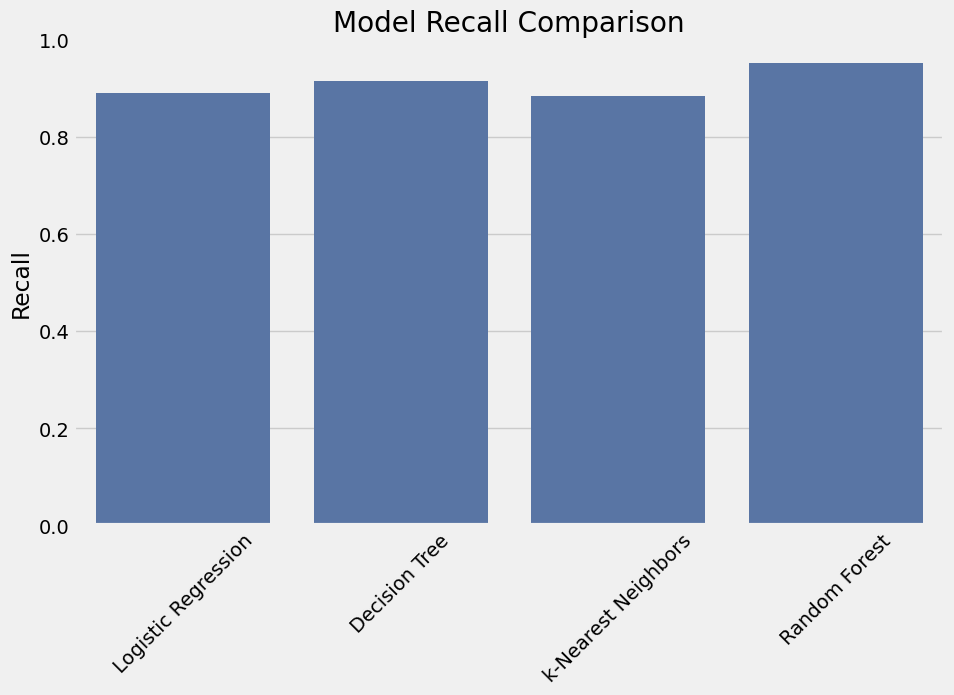

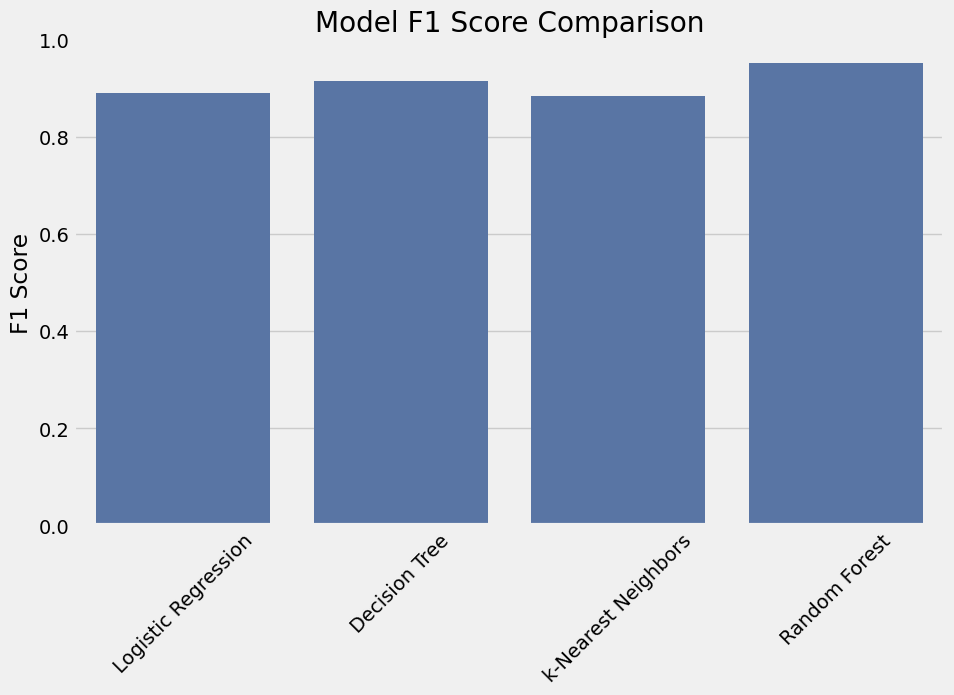

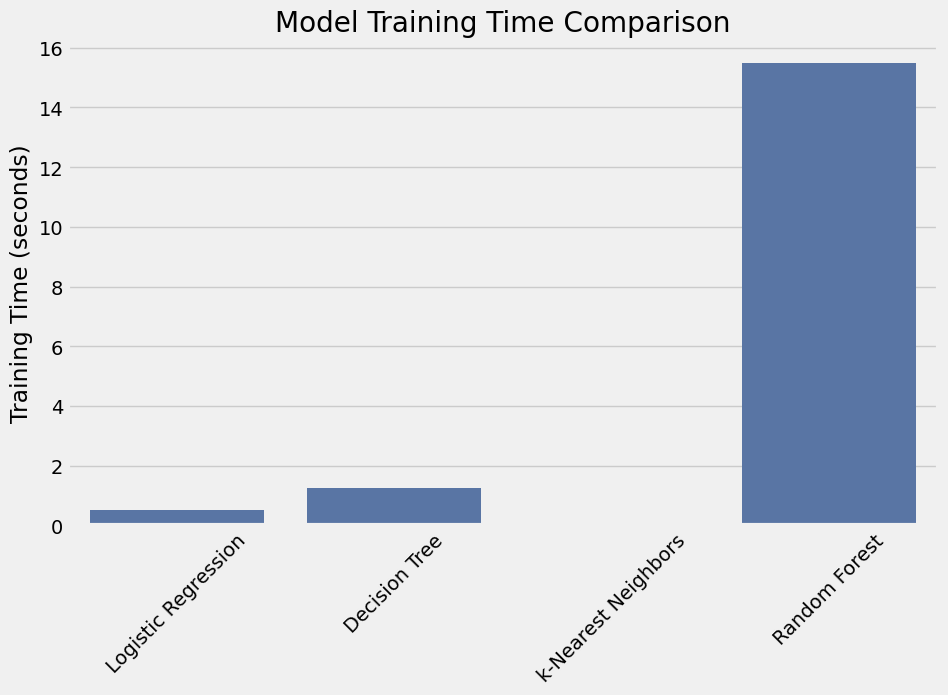

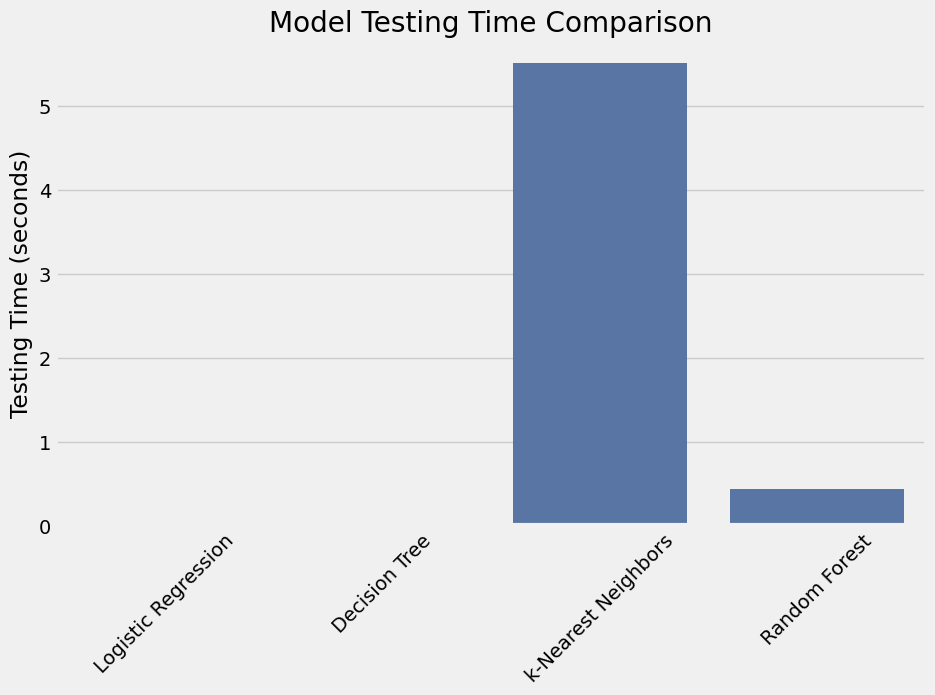

,Model,Accuracy,Precision,Recall,F1 Score,Training Time (s),Testing Time (s)
3,Random Forest,95.25,95.25,95.25,95.25,15.5028,0.4299
1,Decision Tree,91.46,91.62,91.46,91.45,1.2523,0.0153
0,Logistic Regression,88.97,89.18,88.97,88.96,0.5113,0.0000
2,k-Nearest Neighbors,88.33,88.35,88.33,88.33,0.0735,5.5188


In [11]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    #"Support Vector Machine": SVC(kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
training_times = {}
testing_times = {}
all_cms = {}

plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    print(f"\n--- {name} ---")
    
    # Measure training time
    start_train = time.time()
    model.fit(X_train_scaled, y_train_final)
    train_time = time.time() - start_train
    training_times[name] = train_time
    
    # Measure testing time
    start_test = time.time()
    y_pred = model.predict(X_test_scaled)
    test_time = time.time() - start_test
    testing_times[name] = test_time
    
    # Calculate metrics
    acc = accuracy_score(y_test_final, y_pred)
    prec = precision_score(y_test_final, y_pred, average='weighted')
    rec = recall_score(y_test_final, y_pred, average='weighted')
    f1 = f1_score(y_test_final, y_pred, average='weighted')
    cm = confusion_matrix(y_test_final, y_pred)
    
    # Store metrics
    results[name] = acc
    precision_scores[name] = prec
    recall_scores[name] = rec
    f1_scores[name] = f1
    all_cms[name] = cm
    
    # Print results
    print("Accuracy:", round(acc * 100, 2), "%")
    print("Precision:", round(prec * 100, 2), "%")
    print("Recall:", round(rec * 100, 2), "%") 
    print("F1 Score:", round(f1 * 100, 2), "%")
    print("Training time: {:.4f} seconds".format(train_time))
    print("Testing time: {:.4f} seconds".format(test_time))
    print("Classification Report:\n", classification_report(y_test_final, y_pred))
    print("Confusion Matrix:\n", cm)
    
    # Plot confusion matrix
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Graduate', 'Graduate'],
                yticklabels=['Not Graduate', 'Graduate'])
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Plot precision comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(precision_scores.keys()), y=list(precision_scores.values()))
plt.title("Model Precision Comparison")
plt.ylabel("Precision")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Plot recall comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(recall_scores.keys()), y=list(recall_scores.values()))
plt.title("Model Recall Comparison")
plt.ylabel("Recall")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Plot F1 comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()))
plt.title("Model F1 Score Comparison")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Plot training times
plt.figure(figsize=(10, 6))
sns.barplot(x=list(training_times.keys()), y=list(training_times.values()))
plt.title("Model Training Time Comparison")
plt.ylabel("Training Time (seconds)")
plt.xticks(rotation=45)
plt.show()

# Plot testing times
plt.figure(figsize=(10, 6))
sns.barplot(x=list(testing_times.keys()), y=list(testing_times.values()))
plt.title("Model Testing Time Comparison")
plt.ylabel("Testing Time (seconds)")
plt.xticks(rotation=45)
plt.show()

# Create a comprehensive summary table of results
summary_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [round(acc * 100, 2) for acc in results.values()],
    'Precision': [round(prec * 100, 2) for prec in precision_scores.values()],
    'Recall': [round(rec * 100, 2) for rec in recall_scores.values()],
    'F1 Score': [round(f1 * 100, 2) for f1 in f1_scores.values()],
    'Training Time (s)': [round(time, 4) for time in training_times.values()],
    'Testing Time (s)': [round(time, 4) for time in testing_times.values()]
})
display(summary_df.sort_values('Accuracy', ascending=False))

## 5. Hyperparameter Tuning

Let's optimize our models using GridSearchCV to find the best hyperparameters.

### 5.1 Random Forest Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning for Random Forest
print("\n--- Hyperparameter Tuning for Random Forest ---")
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Measure training time
start_time = time.time()
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_scaled, y_train_final)
tuning_time_rf = time.time() - start_time

print(f"Best parameters: {grid_rf.best_params_}")
print(f"Best cross-validation score: {grid_rf.best_score_:.4f}")
print(f"Time taken: {tuning_time_rf:.2f} seconds")

# Use the best model for prediction
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test_final, y_pred_rf)
prec_rf = precision_score(y_test_final, y_pred_rf, average='weighted')
rec_rf = recall_score(y_test_final, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_final, y_pred_rf, average='weighted')
cm_rf = confusion_matrix(y_test_final, y_pred_rf)

print(f"Test accuracy with tuned Random Forest: {acc_rf:.4f}")
print(f"Test precision with tuned Random Forest: {prec_rf:.4f}")
print(f"Test recall with tuned Random Forest: {rec_rf:.4f}")
print(f"Test F1 score with tuned Random Forest: {f1_rf:.4f}")
print(f"Classification Report:\n{classification_report(y_test_final, y_pred_rf)}")

# Plot confusion matrix for tuned Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Not Graduate', 'Graduate'],
           yticklabels=['Not Graduate', 'Graduate'])
plt.title('Tuned Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot feature importance
feature_importances = best_rf.feature_importances_
features = X_train_final.columns
indices = np.argsort(feature_importances)[-10:]

plt.figure(figsize=(10, 8))
plt.title('Feature Importances - Tuned Random Forest')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


--- Hyperparameter Tuning for Random Forest ---


### 5.2 k-Nearest Neighbors Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning for KNN
print("\n--- Hyperparameter Tuning for k-Nearest Neighbors ---")
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Measure training time
start_time = time.time()
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train_final)
tuning_time_knn = time.time() - start_time

print(f"Best parameters: {grid_knn.best_params_}")
print(f"Best cross-validation score: {grid_knn.best_score_:.4f}")
print(f"Time taken: {tuning_time_knn:.2f} seconds")

# Use the best model for prediction
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test_final, y_pred_knn)
prec_knn = precision_score(y_test_final, y_pred_knn, average='weighted')
rec_knn = recall_score(y_test_final, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test_final, y_pred_knn, average='weighted')
cm_knn = confusion_matrix(y_test_final, y_pred_knn)

print(f"Test accuracy with tuned KNN: {acc_knn:.4f}")
print(f"Test precision with tuned KNN: {prec_knn:.4f}")
print(f"Test recall with tuned KNN: {rec_knn:.4f}")
print(f"Test F1 score with tuned KNN: {f1_knn:.4f}")
print(f"Classification Report:\n{classification_report(y_test_final, y_pred_knn)}")

# Plot confusion matrix for tuned KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Not Graduate', 'Graduate'],
           yticklabels=['Not Graduate', 'Graduate'])
plt.title('Tuned k-NN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Compare the performance of tuned models
tuned_results = {
    "Random Forest (Tuned)": acc_rf,
    "k-NN (Tuned)": acc_knn
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(tuned_results.keys()), y=list(tuned_results.values()))
plt.title("Tuned Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Create a summary DataFrame for all models
summary_tuned = pd.DataFrame({
    'Model': list(tuned_results.keys()),
    'Accuracy': [round(acc * 100, 2) for acc in tuned_results.values()],
    'Best Parameters': [
        str(grid_rf.best_params_),
        str(grid_knn.best_params_)
    ],
    'Tuning Time (s)': [
        round(tuning_time_rf, 2),
        round(tuning_time_knn, 2)
    ]
})

display(summary_tuned.sort_values('Accuracy', ascending=False))


--- Hyperparameter Tuning for Random Forest ---


KeyboardInterrupt: 